$Building \space a \space open \space AI-GYM \space environment!$

In [ ]:
#importing dependencies
from gym import Env
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [ ]:
#this class defines a 2D coordinate system
class Coordinate(object):
  def __init__(self, x, y, is_dangerous):
    #changing x will move vertically and y will move horizontally
    self.x = x
    self.y = y
    self.danger = is_dangerous
  def __str__(self):
    return "({}, {}, {})".format(self.x, self.y, self.danger)

${\bf Dangerous \space Gridworld}$

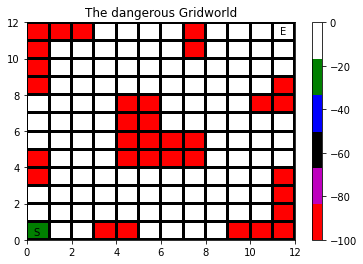

In [ ]:
#We need extend the functionalities of the Env class (the superclass here is the env class)
#This is the environment class: where our agent will learn.
class dangerous_gridWorld(Env):
  #override the the following, in the Env class
  def __init__(self, grid_specs=[12,12], start_state=[0, 0], end_state=[11, 11], danger_states = [[False, False, False, True, True, False, False, False, False, True, True, True], 
                                                                                                  [False, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [False, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, True], 
                                                                                                  [True, False, False, False, True, True, True, True, False, False, False, False], 
                                                                                                  [False, False, False, False, True, True, True, True, False, False, False, False], 
                                                                                                  [False, False, False, False, True, True, False, False, False, False, False, False], 
                                                                                                  [False, False, False, False, True, True,  False, False, False, False, True, True], 
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, True],
                                                                                                  [True, False, False, False, False, False, False, False, False, False, False, False],
                                                                                                  [True, False, False, False, False, False, False, True, False, False, False, False], 
                                                                                                  [True, True, True, False, False, False, False, True, False, False, False, False]]):
  
    #initialize out setting, state space, action and rewards
    self.grid_specs = grid_specs
    #Dynamics of the MDP
    #action space
    self.actions =  ['left', 'up', 'right', 'down']
    #state space (defines the shape of the gridworld)
    #the states in itself has the knowledge of whether it is dangerous
    self.states = [[Coordinate(i, j, danger_states[i][j]) for j in range(grid_specs[1])] for i in range(grid_specs[0])]
    #for a SSPP
    self.start_state = Coordinate(start_state[0], start_state[1], False)
    self.end_state = Coordinate(end_state[0], end_state[1], False)
    
    #since the transition probabilities are deterministic 
    #(i.e.: next state and reward is determinitic and hence we don't need to define it)

  def get_D_i(self):
    D_i = np.zeros(shape=self.grid_specs, dtype=bool)
    for i in range(self.grid_specs[0]):
      for j in range(self.grid_specs[1]):
        if (self.states[i][j].danger==True):
          D_i[i][j] = True
        elif i==0 or j==0:
          if i==0 and (j<self.grid_specs[1]-1 and self.states[i][j+1].danger == True) or (j-1>0 and self.states[i][j-1].danger == True):
            D_i[i][j] = True
          elif j==0 and (i<self.grid_specs[0]-1 and self.states[i+1][j].danger == True) or (i-1>0 and self.states[i-1][j].danger == True):
            D_i[i][j] = True  
          else:
            D_i[i][j] = False
        elif i==self.grid_specs[0]-1 or j==self.grid_specs[1]-1:
          if i==self.grid_specs[0]-1 and (j<self.grid_specs[1]-1 and self.states[i][j+1].danger == True) or (j-1>0 and self.states[i][j-1].danger == True):
            D_i[i][j] = True
          elif j==self.grid_specs[1]-1 and (i<self.grid_specs[0]-1 and self.states[i+1][j].danger == True) or (i-1>0 and self.states[i-1][j].danger == True):
            D_i[i][j] = True  
          else:
            D_i[i][j] = False
        elif (self.states[i+1][j].danger == True or self.states[i-1][j].danger == True) or (self.states[i][j+1].danger == True or self.states[i][j-1].danger ==True):
          D_i[i][j] = True
    return D_i

  def step(self, state, action):
    #current state is of Coordinate type and action is a single string

    #define the dynamics of a single step
    #(0,0) is the start state and (7, 7) is the terminal state
    #Going outside the grid incurs a penalty of -5 and entering the dangerous states makes the penalty be as high as -20 (hoping teacher can save the day)
    #x axis and y axis are inverted here
    next_state = None
    #flag_out = False
    reward = -1
    if action == 'left':
      if state.y - 1 < 0:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #flag_out = True
      else:
        next_state = self.states[state.x][state.y-1]
        
    elif action == "up":
      if state.x + 1 > self.end_state.x:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #went out of the grid
      else:
        next_state = self.states[state.x+1][state.y]
          
    elif action == "right":
      if state.y + 1 > self.end_state.y:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #went out of the grid
      else:
        next_state = self.states[state.x][state.y+1]
        #if the next state is a danger state: then a reward of -20 will be encountered

    elif action == "down":
      if state.x - 1 < 0:
        #going out of the grid
        next_state = self.states[state.x][state.y]
        #flag_out = True
      else:
        next_state = self.states[state.x-1][state.y]
        #if the next state is a danger state: then a reward of -20 will be encountered
    else:
      print("Invalid Action")
      next_state = state
      reward = 0

    #if flag_out== True:
    #  reward = -20
    #if the next state is a danger state: then a reward of -20 will be encountered
    if self.states[next_state.x][next_state.y].danger == True:
      reward = -100

    done = False
    if next_state.x == self.end_state.x and next_state.y == self.end_state.y:
      done = True
    #an empty dictionary needs to be returned as prescribed by the documents. This is used for returning any extra information
    info = {}
    return next_state, reward, done, info

  def render(self, current_state, title=""):
    #render graphics for the environment
    mesh_gd = np.zeros((self.end_state.x+1, self.end_state.y+1))
    for i in range(mesh_gd.shape[0]):
      for j in range(mesh_gd.shape[1]):
        if self.states[i][j].danger == True:
          mesh_gd[i][j] = -100
        else:
          mesh_gd[i][j] = 0 
    mesh_gd[current_state.x][current_state.y] = -20
    plt.pcolormesh(mesh_gd, edgecolors='black', linewidth=2, cmap = col.ListedColormap(['r', 'm', 'k', 'b', 'g', 'w']))
    plt.colorbar()
    #adjusting text according to the relative positioning
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The dangerous Gridworld"+title)
   
  def disp2(self, dang_states):
    mesh_gd = np.zeros((self.end_state.x+1, self.end_state.y+1))
    for i in range(mesh_gd.shape[0]):
      for j in range(mesh_gd.shape[1]):
        if self.states[i][j].danger == True:
          mesh_gd[i][j] = -100
        elif dang_states[i][j] == True:
          mesh_gd[i][j] = -40
        else:
          mesh_gd[i][j] = 0
    
    plt.pcolormesh(mesh_gd, edgecolors='black', linewidth=2, cmap = col.ListedColormap(['r', 'y', 'w']))
    plt.colorbar()
    #adjusting text according to the relative positioning
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The teacher's knowledge of the grid world")

  def reset(self):
    #reset at the end of an episode
    return self.start_state
  
  def is_terminal(self, state):
    if state.x == self.end_state.x and state.y == self.end_state.y:
      return True
    return False

  def __str__(self):
    print("states: ")
    for i in range(self.grid_specs[0]):
      for j in range(self.grid_specs[1]):
        print(self.states[i][j])
    print('Start State: {}'.format(self.start_state))
    print('End State: {}'.format(self.end_state))
    return "actions: {}".format(self.actions)

gw = dangerous_gridWorld()
#gw.render(Coordinate(0, 0, True))
gw.render(gw.start_state)
#gw.render(gw.end_state)
#n_state, reward = gw.step(gw.states[1][2], "down")
#print(n_state, reward)

${\bf Tabular \space Method}: Policy \space Iteration$

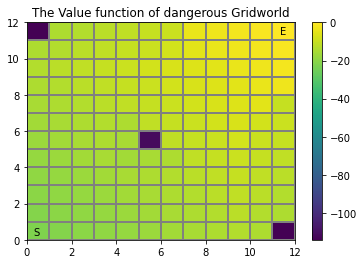

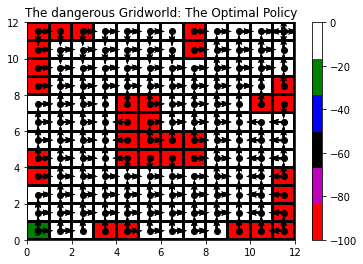

In [ ]:
#Step 1: policy iteration (for getting the optimal policy) to get the optimal policy
#Step 2: (a) Q-learning (Sample based technique to get optimal value function and policy)
#        (b) SARSA/ and Expected Sarsa to compare performance
#Step 3: To find compare the performance of the teacher-student based algorithm with the above
class policy_itertion_Agent(object):
  #NOTE: env is the environment object
  def __init__(self, env):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    #generates the policy map
    #pi has 1 if you can select an action otherwise it will be 0
    self.pi_indicator = np.ones((env.grid_specs[0], env.grid_specs[1], len(env.actions))) #3D matrix
    #This will store the conditional probability p(s', r|s, a)
    #for this the P values will be equiprobable in all the next states that is optimal
    self.pi_prob = self.update_P()
    #discount factor
    self.gamma = 1
  def reset(self, env):
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    #generates the policy map
    #pi has 1 if you can select an action otherwise it will be 0
    self.pi_indicator = np.ones((env.grid_specs[0], env.grid_specs[1], len(env.actions))) #3D matrix
    #This will store the conditional probability p(s', r|s, a)
    #for this the P values will be equiprobable in all the next states that is optimal
    self.pi_prob = self.update_P()

  def reset_V(self, env):
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
  def update_P(self):
    return self.pi_indicator / (np.sum(self.pi_indicator, axis=2, keepdims=True))

  def update_state(self, env, this_state):
    # The value of the terminal state is always set to 0
    if env.is_terminal(this_state) == True:
      return 0
    #non terminal states
    update_value = 0
    for action in env.actions:
      #actions possible are same for everyone here
      next_state, reward, _, _ = env.step(this_state, action)
      #print(this_state.x, this_state.y, action, next_state.x, next_state.y, reward)
      #Bellman update rule, deterministic environment and hence there is no inner loop
      #print(self.pi_prob[this_state.x, this_state.y, env.actions.index(action)])
      update_value = update_value + self.pi_prob[this_state.x, this_state.y, env.actions.index(action)]*(reward + self.gamma*self.V[next_state.x, next_state.y])
    return update_value

  def policy_evaluation(self, env, max_iter = 1000, epsilon = 1e-9):
    #finds the value function of the current policy
    for itr in range(max_iter):
      theta = 0    
      #This is iteration over all the states
      for i in range(self.V.shape[0]):
        for j in range(self.V.shape[1]):
          if env.is_terminal(env.states[i][j]):
            break
          old_val = np.copy(self.V[i, j])
          self.V[i, j] = self.update_state(env, env.states[i][j])
          theta = np.maximum(theta, np.abs(self.V[i, j] - old_val))
      if theta < epsilon:
        break
  #return all the best actions
  def greedy_action(self, env, this_state):
    import math
    # The value of the terminal state is always set to 0
    if env.is_terminal(this_state) == True:
      pol_new = [0, 1, 2, 3] #returns the actions possible 
      return pol_new
    #non terminal states
    max_value = -1*float('inf')
    temp_actions = []
    ctr = 0
    for action in env.actions:
      #actions possible are same for everyone here
      next_state, reward, _, _ = env.step(this_state, action)
      #Bellman update rule, deterministic environment and hence there is no inner loop
      next_value = (reward + self.gamma*self.V[next_state.x, next_state.y])
      #index of maximizing action
      if math.isclose(next_value, max_value):
        temp_actions.append(ctr)
      elif next_value > max_value:
        temp_actions =  []
        temp_actions.append(ctr)
        max_value = next_value
      
      ctr = ctr + 1
      
    return temp_actions
  
  def policy_improvement(self, env):
    for i in range(self.V.shape[0]):
      for j in range(self.V.shape[1]):
        #if env.is_terminal(env.states[i][j]):
        #    break
        #Need to get the optimal action
        best_actions = self.greedy_action(env, env.states[i][j])
        #resets the pi to change the values
        for ac in range(len(env.actions)):
          self.pi_indicator[i, j, ac] = 0
        for k in best_actions:
          #all greedy actions next
          self.pi_indicator[i, j, k] = 1 

    self.pi_prob = self.update_P()

  #this is the policy iteration algorithm
  def policy_itertion(self, env):
    while True:
      old_V = np.copy(self.V)
      self.reset_V(env)
      self.policy_evaluation(env)
      #this improvement, once this ends improving, we are sure that the algorithm has converged
      self.policy_improvement(env)
      #once improvement is no longer possible
      if np.allclose(old_V, self.V):
        break

  def print_optimal_value_function(self, env):
    #env.render(env.start_state)
    plt.pcolormesh(self.V, edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The Value function of dangerous Gridworld")
    plt.colorbar()
    plt.show()
    #print(self.V)
    
  def print_optimal_policy(self, env):
    env.render(env.states[0][0], ": The Optimal Policy")
    for i in range(env.grid_specs[0]):
       for j in range(env.grid_specs[1]):
        plt.scatter(i+0.5, j+0.5, color='black')
        for k in range(len(env.actions)): 
          #print arrow (x, y, dx, dy) 
          #print along j first (because here we are printing from row-wise from bottom to up but pi_indicator, 
          #and quiver follow caresian convention, which is opposite of pcolormesh convention)
          if self.pi_indicator[i, j, 0]==1:
            #left
            plt.quiver(j+0.5, i+0.5, -0.4, 0, color='black')
          if self.pi_indicator[i, j, 1]==1:
            #up
            plt.quiver(j+0.5, i+0.5, 0, 0.4, color='black')
          if self.pi_indicator[i, j, 2]==1:
            #right
            plt.quiver(j+0.5, i+0.5, 0.4, 0, color='black')
          if self.pi_indicator[i, j, 3]==1:
            #down
            plt.quiver(j+0.5, i+0.5, 0, -0.4, color='black')
          

#testing performance of policy iteration

agent_p_iter = policy_itertion_Agent(gw)  
#agent_p_iter.reset(gw) 
agent_p_iter.policy_itertion(gw)
agent_p_iter.print_optimal_value_function(gw)
agent_p_iter.print_optimal_policy(gw)

Completed run 0
Completed run 10000
Completed run 20000
Completed run 30000
Completed run 40000


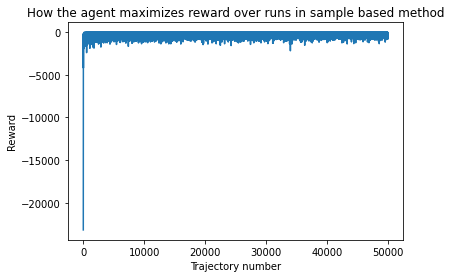

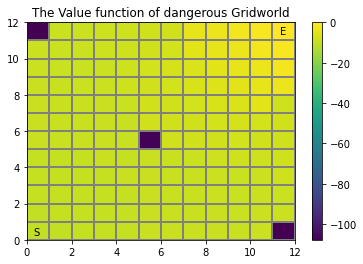

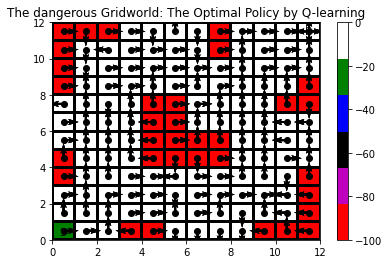

In [ ]:
#testing the environment with sample based methods: Used (Q-learning): OFF Policy learning rule
class Q_learning_Agent(object):
  def __init__(self, env, eps=0.1):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    #discount factor
    self.gamma = 1
    self.epsilon = eps
    #present dynamics
    self.prev_state = None
    self.prev_action = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def reset(self, env):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    self.prev_state = None
    self.prev_action = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def lr_scheduler(self, this_state, action):
    #a = b = 1 (lr = a/(m+b) : for the mth update)
    #return 0.1
    return 1/(1+self.num_visit[this_state.x, this_state.y, action])

  #breaks ties randomly
  def argmax(self, vec):
    import math
    max_value = np.max(vec)
    ctr = 0
    all_maxpos = []
    for val in vec:
      if math.isclose(val, max_value):
        all_maxpos.append(ctr)
      ctr += 1
    return all_maxpos

  #this is for exploration/exploration tradeoff
  def behav_action(self, env):
    qval_prev_state = self.Q[self.prev_state.x, self.prev_state.y, :]
    #this breaks ties randomly
    sample_uni_0_1 = np.random.random()
    #with prob 1-eps we choose a 'good' action
    if sample_uni_0_1 > self.epsilon:
      #here only faesible actions compete
      return np.random.choice(self.argmax(qval_prev_state))
    else:
      return np.random.choice(len(qval_prev_state)) 

  def target_action(self, env, this_state):
    #this will return the best action in a particular state
    return np.random.choice(self.argmax(self.Q[this_state.x, this_state.y, :]))

  def start(self, env):
    #this is a beginning of an episode
    self.prev_state = env.start_state
    #here action is chosen in accordance to the behaviour policy of the agent
    #we are choosing this action as a number, convert to actual action using env.actions
    #take action in an offpolicy way (here we are using epsilon greedy)
    self.prev_action = self.behav_action(env)

  def step(self, env, cumu_reward):
    #first 2 components represent the state and the second one represent the reward
    this_state, reward, _, _ = env.step(self.prev_state, env.actions[self.prev_action])
    cumu_reward += reward

    if env.is_terminal(this_state) == True:
      return self.end(env, reward), cumu_reward
      
    #this is chosen with respect to the target policy (what we wish to learn)
    maximizing_action = self.target_action(env, this_state)
    #Q-learning update rule
    del_t = reward + self.gamma*self.Q[this_state.x, this_state.y, maximizing_action] - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]
    
    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t
    
    #Now we are in the next_state
    self.prev_state = this_state
    self.prev_action = self.behav_action(env)
    return False, cumu_reward
    
  def end(self, env, reward):
    #whenever this_state will be the end_state this will be called, for the end state you don't see the next state
    del_t = reward - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]
    
    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t
    #returns true when the current path ends
    return True

  def complete_trajectory(self, env):
    completed = False
    reward_rec = 0
    #this completes a trajectory
    while True:
      prev_state= self.prev_state
      prev_action = self.prev_action
      completed, reward_rec = self.step(env, reward_rec)
      if completed == True:
        break
      #updating the number of visits
      self.num_visit[prev_state.x, prev_state.y, prev_action] += 1  
    return reward_rec
  
  def q_learning(self, env, max_runs=5000, avg_over=5):
    history = np.zeros((avg_over, max_runs))
    for a in range(avg_over):
      self.reset(env)       
      for i in range(max_runs):
        self.start(env)
        history[a, i] = self.complete_trajectory(env)
        if i%10000 == 0:
          print("Completed run {}".format(i))
      
    avg_history = np.mean(history, axis=0)
    plt.plot(avg_history)
    plt.xlabel("Trajectory number")
    plt.ylabel("Reward")
    plt.title("How the agent maximizes reward over runs in sample based method")
    plt.show()
    return avg_history

  def compute_V_and_pi(self):
    #computes V* and pi*
    self.V = np.max(self.Q, axis=2)
    for i in range(self.V.shape[0]):
      for j in range(self.V.shape[1]):
        opt_act = self.argmax(self.Q[i, j, :])
        for ac in opt_act:
          self.pi_indicator[i, j, ac] = 1

  def display_num_visits(self):
    #env.render(env.start_state)
    plt.pcolormesh(np.sum(self.num_visit, axis=2), edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("number of visits in each state")
    plt.colorbar()
    plt.show()
    #print(self.V)
  
  def print_optimal_value_function(self, env):
    #env.render(env.start_state)
    plt.pcolormesh(self.V, edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The Value function of dangerous Gridworld")
    plt.colorbar()
    plt.show()
    #print(self.V)

  def print_optimal_policy(self, env):
    env.render(env.states[0][0], ": The Optimal Policy by Q-learning")
    for i in range(env.grid_specs[0]):
       for j in range(env.grid_specs[1]):
        plt.scatter(i+0.5, j+0.5, color='black')
        for k in range(len(env.actions)): 
          #print arrow (x, y, dx, dy) 
          #print along j first (because here we are printing from row-wise from bottom to up but pi_indicator, 
          #and quiver follow caresian convention, which is opposite of pcolormesh convention)
          if self.pi_indicator[i, j, 0]==1:
            #left
            plt.quiver(j+0.5, i+0.5, -0.5, 0, color='black')
          if self.pi_indicator[i, j, 1]==1:
            #up
            plt.quiver(j+0.5, i+0.5, 0, 0.5, color='black')
          if self.pi_indicator[i, j, 2]==1:
            #right
            plt.quiver(j+0.5, i+0.5, 0.5, 0, color='black')
          if self.pi_indicator[i, j, 3]==1:
            #down
            plt.quiver(j+0.5, i+0.5, 0, -0.5, color='black')
          
q_agent = Q_learning_Agent(gw, 0.33)
q_agent.q_learning(gw, 50000, 1)
q_agent.compute_V_and_pi()
q_agent.print_optimal_value_function(gw)
q_agent.print_optimal_policy(gw)

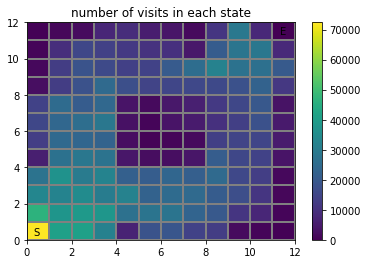

In [ ]:
q_agent.display_num_visits()

**CISR from Scratch**

In [ ]:
#CISR
#a. Agent
#testing the environment with sample based methods: Used (Q-learning): OFF Policy learning rule
class Student(object):
  def __init__(self, env, eps=0.1, max_helps=30, need_help=False):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    #discount factor
    self.max_helps = max_helps
    self.gamma = 1
    self.epsilon = eps
    #present dynamics
    self.prev_state = None
    self.prev_action = None
    self.under_supervision = need_help
    self.teacher_reset = False
    self.t_reset_state = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def reset(self, env):
    #for tabular methods V and pi is sufficient (Here we are trying to maximize reward)
    #Q-function
    self.Q = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    self.V = np.zeros((env.grid_specs[0], env.grid_specs[1]))
    self.pi_indicator = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))
    #target policy: argmax (always choosing the best action)
    #behaviour policy: argmax (epsilon greedy), select action in state S according to this
    self.prev_state = None
    self.prev_action = None
    #this is for scheduling the learning rate
    self.num_visit = np.zeros((env.grid_specs[0], env.grid_specs[1], len(env.actions)))

  def lr_scheduler(self, this_state, action):
    #a = b = 1 (lr = a/(m+b) : for the mth update)
    #return 0.1
    return 1/(1+self.num_visit[this_state.x, this_state.y, action])

  #breaks ties randomly
  def argmax(self, vec):
    import math
    max_value = np.max(vec)
    ctr = 0
    all_maxpos = []
    for val in vec:
      if math.isclose(val, max_value):
        all_maxpos.append(ctr)
      ctr += 1
    return all_maxpos

  #this is for exploration/exploration tradeoff
  def behav_action(self, env):
    qval_prev_state = self.Q[self.prev_state.x, self.prev_state.y, :]
    #this breaks ties randomly
    sample_uni_0_1 = np.random.random()
    #with prob 1-eps we choose a 'good' action
    if sample_uni_0_1 > self.epsilon:
      #here only faesible actions compete
      return np.random.choice(self.argmax(qval_prev_state))
    else:
      return np.random.choice(len(qval_prev_state)) 

  def target_action(self, env, this_state):
    #this will return the best action in a particular state
    return np.random.choice(self.argmax(self.Q[this_state.x, this_state.y, :]))

  def start(self, env):
    #this is a beginning of an episode
    self.prev_state = env.start_state
    #here action is chosen in accordance to the behaviour policy of the agent
    #we are choosing this action as a number, convert to actual action using env.actions
    #take action in an offpolicy way (here we are using epsilon greedy)
    self.prev_action = self.behav_action(env)

  def step(self, teacher, env, cumu_reward):
    #first 2 components represent the state and the second one represent the reward
    this_state = None
    reward = 0
    if self.teacher_reset == False:
      #print(self.prev_state, self.prev_action)
      this_state, reward, _, _ = env.step(self.prev_state, env.actions[self.prev_action])
    else:
      #print(self.prev_state, self.prev_action)
      #print("Here")
      this_state = self.t_reset_state
      
    if env.is_terminal(this_state) == True:
      return self.end(env, reward), cumu_reward

    #this is chosen with respect to the target policy (what we wish to learn)
    maximizing_action = self.target_action(env, this_state)
    #Q-learning update rule
    teacher_int, soft_penalty = None, None
    if self.max_helps>0:
      teacher_int, soft_penalty = teacher.intervention(this_state)
    elif self.under_supervision == True: 
      self.epsilon = 1e-2

    if teacher_int != None:
      self.max_helps -= 1
      #this means that the teacher is intervening the student is in D_i and the current action is overridden 
      self.t_reset_state = teacher_int.coordinate
      reward = soft_penalty
    else:
      cumu_reward += reward

    #if reward == -100:
    #  print("here")

    del_t = reward + self.gamma*self.Q[this_state.x, this_state.y, maximizing_action] - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]
    
    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t
    
    #Now we are in the next_state, either sample according to policy if the current state is not in D_i, otherwise go for teacher's suggestion
    self.prev_state = this_state
    if teacher_int != None:
      self.teacher_reset = True
      self.prev_action = teacher_int.action
    else:
      self.teacher_reset = False
      self.prev_action = self.behav_action(env)
    
    return False, cumu_reward
    
  def end(self, env, reward):
    #whenever this_state will be the end_state this will be called, for the end state you don't see the next state
    del_t = reward - self.Q[self.prev_state.x, self.prev_state.y, self.prev_action]
    
    self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] = self.Q[self.prev_state.x, self.prev_state.y, self.prev_action] + self.lr_scheduler(self.prev_state, self.prev_action)*del_t
    #returns true when the current path ends
    return True

  def complete_trajectory(self, teacher, env):
    completed = False
    reward_rec = 0
    #this completes a trajectory
    while True:
      prev_state= self.prev_state
      prev_action = self.prev_action
      completed, reward_rec = self.step(teacher, env, reward_rec)
      if completed == True:
        break
      #updating the number of visits
      self.num_visit[prev_state.x, prev_state.y, prev_action] += 1  
    return reward_rec
  
  def q_learning(self, env, teacher, max_runs=5000, avg_over=1, to_plot=False):
    history = np.zeros((avg_over, max_runs))
    for a in range(avg_over):
      self.reset(env)       
      for i in range(max_runs):
        self.start(env)
        history[a, i] = self.complete_trajectory(teacher, env)
        if i%10000 == 0:
          print("Completed run {}".format(i))
      
    avg_history = np.mean(history, axis=0)
    if to_plot == True:
      plt.plot(avg_history)
      plt.xlabel("Trajectory number")
      plt.ylabel("Reward")
      plt.title("How the agent maximizes reward over runs in sample based method")
      plt.show()

    return avg_history

  def compute_V_and_pi(self):
    #computes V* and pi*
    self.V = np.max(self.Q, axis=2)
    for i in range(self.V.shape[0]):
      for j in range(self.V.shape[1]):
        opt_act = self.argmax(self.Q[i, j, :])
        for ac in opt_act:
          self.pi_indicator[i, j, ac] = 1

  def display_num_visits(self):
    #env.render(env.start_state)
    plt.pcolormesh(np.sum(self.num_visit, axis=2), edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("number of visits in each state")
    plt.colorbar()
    plt.show()
    #print(self.V)
  
  def print_optimal_value_function(self, env):
    #env.render(env.start_state)
    plt.pcolormesh(self.V, edgecolors='grey')
    plt.figtext(0.71, 0.84, "E")
    plt.figtext(0.14, 0.14, "S")
    plt.title("The Value function of dangerous Gridworld")
    plt.colorbar()
    plt.show()
    #print(self.V)

  def print_optimal_policy(self, env):
    env.render(env.states[0][0], ": The Optimal Policy by Q-learning")
    for i in range(env.grid_specs[0]):
       for j in range(env.grid_specs[1]):
        plt.scatter(i+0.5, j+0.5, color='black')
        for k in range(len(env.actions)): 
          #print arrow (x, y, dx, dy) 
          #print along j first (because here we are printing from row-wise from bottom to up but pi_indicator, 
          #and quiver follow caresian convention, which is opposite of pcolormesh convention)
          if self.pi_indicator[i, j, 0]==1:
            #left
            plt.quiver(j+0.5, i+0.5, -0.5, 0, color='black')
          if self.pi_indicator[i, j, 1]==1:
            #up
            plt.quiver(j+0.5, i+0.5, 0, 0.5, color='black')
          if self.pi_indicator[i, j, 2]==1:
            #right
            plt.quiver(j+0.5, i+0.5, 0.5, 0, color='black')
          if self.pi_indicator[i, j, 3]==1:
            #down
            plt.quiver(j+0.5, i+0.5, 0, -0.5, color='black')
    plt.show()

#q_agent = Q_learning_Agent(gw, 0.33)
#q_agent.q_learning(gw, 50000, 1)
#q_agent.compute_V_and_pi()
##q_agent.print_optimal_value_function(gw)
#q_agent.print_optimal_policy(gw)

Although the colours of D and D_i\D are shown differently, the teacher actually doesn't see them differently!
Trained student no: 0! in round 0
Trained student no: 1! in round 0
Trained student no: 2! in round 0
Trained student no: 3! in round 0
Trained student no: 4! in round 0
Trained student no: 5! in round 0
Trained student no: 6! in round 0
Trained student no: 7! in round 0
Trained student no: 8! in round 0
Trained student no: 9! in round 0
Trained student no: 10! in round 0
Trained student no: 11! in round 0
Trained student no: 12! in round 0
Trained student no: 13! in round 0
Trained student no: 14! in round 0
Trained student no: 15! in round 0
Trained student no: 16! in round 0
Trained student no: 17! in round 0
Trained student no: 18! in round 0
Trained student no: 19! in round 0
[[-74.2436 -80.0952 -75.489  -76.7968 -77.3806 -79.7312 -84.865  -79.782
  -67.5588 -84.754  -73.6138 -70.8154 -64.626  -74.0464 -68.0644 -66.3738
  -69.0206 -79.4298 -76.5706 -73.8396]]


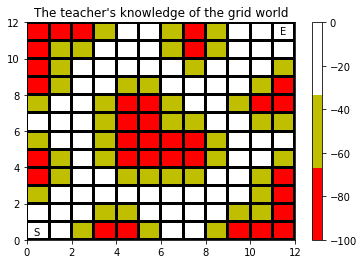

In [57]:
class Teacher_states(object):
  def __init__(self, coord, prob, dir):
    self.coordinate = coord
    self.prob = prob
    self.action = dir
    self.f_reward = 0
    self.num_sel = 0
    self.is_selected  = False
  def __str__(self):
    return "{}, with prob: {}".format(self.coordinate, self.prob)  
#Teacher
class Teacher(object):
  #D_i is the set of dangerous states plus set of states that can lead to dangerous states
  def __init__(self, env, n_random=5, eps=0.1):
    self.dang_states = env.get_D_i()
    #teacher action
    self.T = self.teacher_policy_init(env)
    self.num_knowledge_steps = n_random
    self.epsilon = eps
    #for ele in self.T.keys():
    #  for j in range(len(self.T[ele])):
    #    print(ele, self.T[ele][j])
  def reset_teacher(self, env):
    self.dang_states = env.get_D_i()
    #teacher action
    self.T = self.teacher_policy_init(env)
    
  def reset_T(self):
    for ele in self.T.keys():
      for j in range(len(self.T[ele])):
        self.T[ele][j].is_selected = False
  
  def move_dir_safenext(self, env, i, j, dir):
    exp_x, exp_y = i, j 

    if i<0 or j<0 or i>=env.grid_specs[0] or j>=env.grid_specs[1]:
      return 999
    elif self.dang_states[i][j] == False:
      return 0
    if dir=="left":
      return 1 + self.move_dir_safenext(env, i, j-1, dir)
    if dir=="right":
      return 1 + self.move_dir_safenext(env, i, j+1, dir)
    if dir=="down":
      return 1 + self.move_dir_safenext(env, i-1, j, dir)
    if dir=="up":
      return 1 + self.move_dir_safenext(env, i+1, j, dir)

  def teacher_policy_init(self, env):
    T = {} 
    for i in range(env.grid_specs[0]):
      for j in range(env.grid_specs[1]):
        if self.dang_states[i][j] == True:
          T[(i, j)] = []
          #left is 0, top is 1 
          distl = self.move_dir_safenext(env, i, j, "left")
          distr = self.move_dir_safenext(env, i, j, "right")
          distt = self.move_dir_safenext(env, i, j, "up")
          distb = self.move_dir_safenext(env, i, j, "down")
        
          min_d = np.min(np.array([distl, distr, distl, distb]))
          if distl == min_d:
            T[(i, j)].append(Teacher_states(Coordinate(i, j-min_d, False), 1, 0))
          if distr == min_d:
            T[(i, j)].append(Teacher_states(Coordinate(i, j+min_d, False), 1, 2))
          if distt == min_d:
            T[(i, j)].append(Teacher_states(Coordinate(i+min_d, j, False), 1, 1))
          if distb == min_d:
            T[(i, j)].append(Teacher_states(Coordinate(i-min_d, j, False), 1, 3))
    
    for ele in T.keys():
      for j in range(len(T[ele])):
        T[ele][j].prob /= len(T[ele])

    return T
  
  def display_teachers_view(self, env):
    print("Although the colours of D and D_i\D are shown differently, the teacher actually doesn't see them differently!")
    env.disp2(self.dang_states)

  def get_current_act(self, curr_state):
    import math
    next_state, next_act = None, None
    next_state_dist = self.T[(curr_state.x, curr_state.y)]
    if self.num_knowledge_steps > 0:      
      probs = []
      #take a random step, and then only select epsilon greedy
      for i in range(len(next_state_dist)):
        #print(next_state_dist[i])
        probs.append(next_state_dist[i].prob)
      #print(np.random.choice(range(len(next_state_dist)), p=probs))
      next_act = np.random.choice(range(len(next_state_dist)), p=probs)
      #print(next_state)
    else:
      #eps greedy selection
      rewards = []
      #this breaks ties randomly
      sample_uni_0_1 = np.random.random()
      #with prob 1-eps we choose a 'good' action
      index_sel = None
      if sample_uni_0_1 > self.epsilon:
        #here only faesible actions compete
        for i in range(len(next_state_dist)):
          rewards.append(next_state_dist[i].f_reward)
        max_r = np.max(np.array(rewards))
        all_max = []
        for i in range(len(next_state_dist)):
          if math.isclose(max_r, next_state_dist[i].f_reward):
            all_max.append(i)
        next_act = all_max[np.random.choice(len(all_max))]
      else:
        next_act = np.random.choice(len(next_state_dist))
    
    next_state = next_state_dist[next_act]
    return next_state, next_act      
  
  def intervention(self, curr_state):
    next_state = None
    if self.dang_states[curr_state.x][curr_state.y] == True:
      next_state, next_act = self.get_current_act(curr_state) 
      self.T[(curr_state.x, curr_state.y)][next_act].is_selected = True
      self.T[(curr_state.x, curr_state.y)][next_act].num_sel += 1   
    return next_state, -5

  def train_teacher(self, env, num_student, s_episodes, avg_over=5):
    avg_over_trains = np.zeros((avg_over, num_student))
    for k in range(avg_over):
      self.reset_teacher(env)
      for i in range(num_student):
        student_i = Student(env, eps=0.1, max_helps=50, need_help=True)
        cumu = 0
        #update all the actions that were taken
        for Ns in range(s_episodes):
          student_i.start(env)
          r_rec = student_i.complete_trajectory(self, env)
          #print('Here')
          cumu += r_rec
          #if Ns%100 == 0: 
          #  print("here")
          #Computes monte-carlo estimates 
          for ele in self.T.keys():
            for j in range(len(self.T[ele])):
              if self.T[ele][j].is_selected == True:
                self.T[ele][j].f_reward = self.T[ele][j].f_reward + (r_rec - self.T[ele][j].f_reward)/self.T[ele][j].num_sel
          self.reset_T()

        avg_over_trains[k, i] = (cumu/s_episodes)
        self.num_knowledge_steps -= 1
        print("Trained student no: {}! in round {}".format(i, k), flush=True)
     
    print(avg_over_trains)
    return np.mean(np.array(avg_over_trains), axis=0)


teacher = Teacher(gw, 0, 0.1)
teacher.display_teachers_view(gw)
student_reward_per_run = teacher.train_teacher(gw, 20, 5000, 1)
#teacher.intervention(Coordinate(9, 7, False))

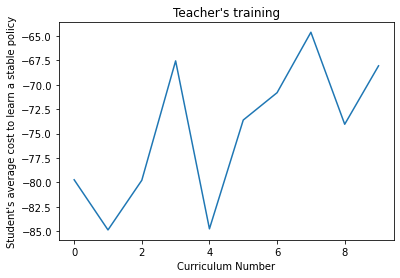

In [59]:
plt.plot(student_reward_per_run)
plt.xlabel("Curriculum Number")
plt.ylabel("Student's average cost to learn a stable policy")
plt.title("Teacher's training")
plt.show()

In [53]:
def plot_curve2(xlim, pts1, pts2, pts3, pts4, x_label, y_label, title, legend, type):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if type != 'bar':
    index = np.arange(1, len(pts1)+1, 1)
    plt.plot(pts1, '-b', label=legend[0])
    plt.plot(pts2, '-r', label=legend[1])
    plt.plot(pts3, '-g', label=legend[2])
    plt.plot(pts4, '-y', label=legend[3])
    plt.xlim([xlim, len(pts1)+5])
    plt.legend()
    plt.show()
  else:
    to_plot = { legend[0]: pts1,
                legend[1]: pts2,
                legend[2]: pts3,
                legend[3]: pts4
              }
    plt.bar(list(to_plot.keys()), list(to_plot.values()))
    plt.show()
#student loss: in presence of a trained teacher
def compare_Q_CISR(env, teacher):
  #q_learning
  q_learning_student = Student(env, eps=0.1, max_helps=0, need_help=False) 
  avg_hist_epochs = q_learning_student.q_learning(env, teacher, max_runs=10000, avg_over=1, to_plot=False)
  q_learning_student.compute_V_and_pi()
  q_learning_student.print_optimal_value_function(env)
  q_learning_student.print_optimal_policy(env)
  q_learning_student.display_num_visits()
  #CISR
  CISR_student_5 = Student(env, eps=0.1, max_helps=10, need_help=True)
  avg_hist_epochs_2 = CISR_student_5.q_learning(env, teacher, max_runs=10000, avg_over=1, to_plot=False)
  CISR_student_5.compute_V_and_pi()
  CISR_student_5.print_optimal_value_function(env)
  CISR_student_5.print_optimal_policy(env)
  CISR_student_5.display_num_visits()
  
  CISR_student_10 = Student(env, eps=0.1, max_helps=25, need_help=True)
  avg_hist_epochs_3 = CISR_student_10.q_learning(env, teacher, max_runs=10000, avg_over=1, to_plot=False)
  CISR_student_10.compute_V_and_pi()
  CISR_student_10.print_optimal_value_function(env)
  CISR_student_10.print_optimal_policy(env)
  CISR_student_10.display_num_visits()
  
  CISR_student_25 = Student(env, eps=0.1, max_helps=50, need_help=True)
  avg_hist_epochs_4 = CISR_student_25.q_learning(env, teacher, max_runs=10000, avg_over=1, to_plot=False)
  CISR_student_25.compute_V_and_pi()
  CISR_student_25.print_optimal_value_function(env)
  CISR_student_25.print_optimal_policy(env)
  CISR_student_25.display_num_visits()
  return avg_hist_epochs, avg_hist_epochs_2, avg_hist_epochs_3, avg_hist_epochs_4 
  #student_reward_per_run = teacher.train_teacher(gw, 20, 10000)

Completed run 0


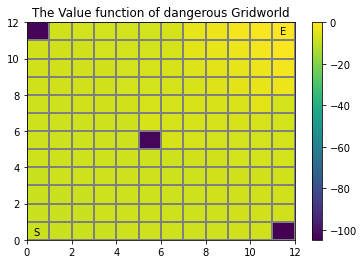

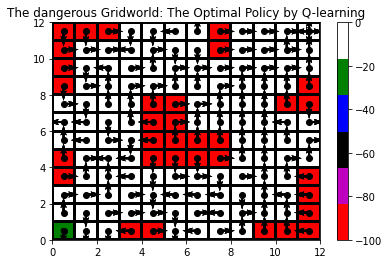

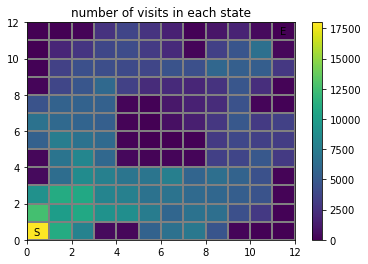

Completed run 0


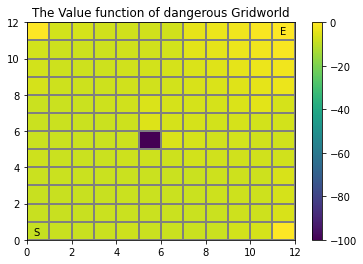

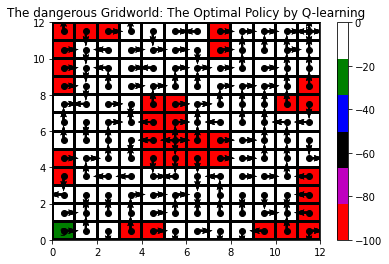

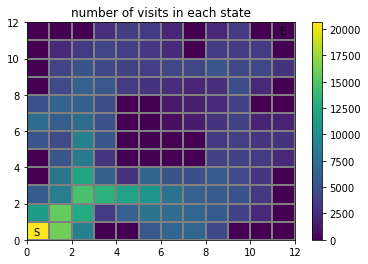

Completed run 0


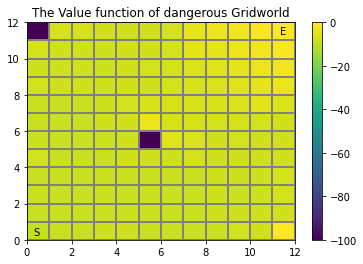

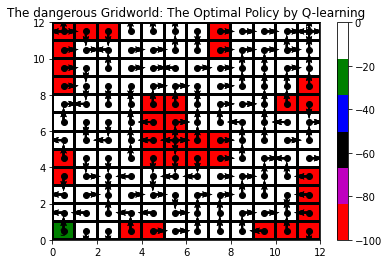

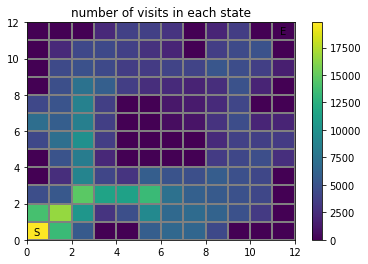

Completed run 0


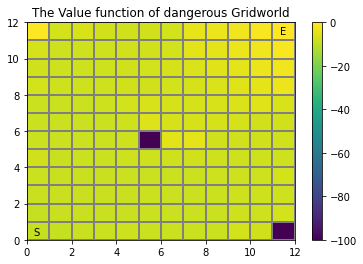

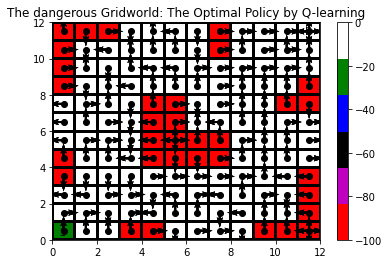

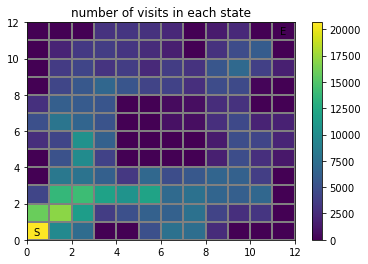

In [26]:
teacher.epsilon = 0
avg_hist_epochs, avg_hist_epochs_2, avg_hist_epochs_3, avg_hist_epochs_4 = compare_Q_CISR(gw, teacher)

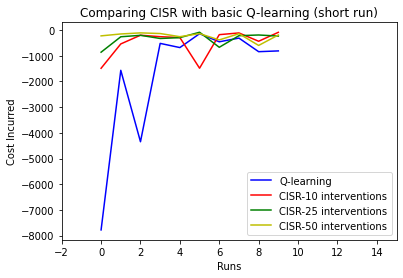

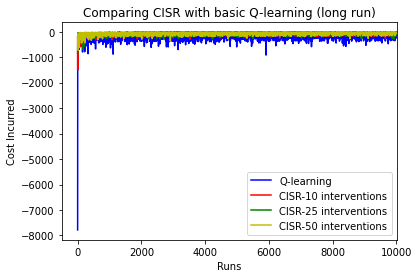

In [40]:
plot_curve2(-2, avg_hist_epochs, avg_hist_epochs_2, avg_hist_epochs_3, avg_hist_epochs_4, "Runs", "Cost Incurred", "Comparing CISR with basic Q-learning (short run)", ["Q-learning", 'CISR-10 interventions', 'CISR-25 interventions', 'CISR-50 interventions'], "timeser")
plot_curve2(-500, avg_hist_epochs, avg_hist_epochs_2, avg_hist_epochs_3, avg_hist_epochs_4, "Runs", "Cost Incurred", "Comparing CISR with basic Q-learning (long run)", ["Q-learning", 'CISR-10 interventions', 'CISR-25 interventions', 'CISR-50 interventions'], "timeser")

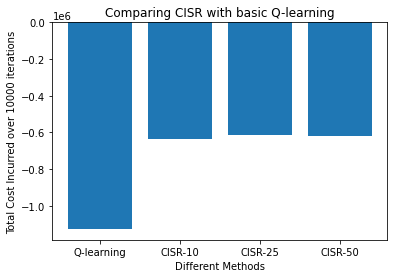

In [56]:
plot_curve2(0, np.sum(avg_hist_epochs), np.sum(avg_hist_epochs_2), np.sum(avg_hist_epochs_3), np.sum(avg_hist_epochs_4), "Different Methods", "Total cost Incurred over 10000 runs", "Comparing CISR with basic Q-learning", ["Q-learning", 'CISR-10', 'CISR-25', 'CISR-50'], "bar")